In [1]:
import sys 
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from flux_models import *

warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

## Notebook description

This ipython notebook executes scripts in this repository to repeat analysis of Bowen ratio information flows in:

AE Goodwell and M Bassiouni (2021). Source relationships and model structures determine information flow paths in ecohydrologic models.

The analysis uses SUMMA model outputs available at https://doi.org/10.5281/zenodo.4735592, which includes FLUXNET2015 data available at https://fluxnet.org/data/fluxnet2015-dataset/.

- *flux_models.py* - Contains functions to calculate the Bowen ration using the SFE method vs SUMMA outputs; evaluate model performance; and create figures to summarize results
- *information_metrics.py* - Contains functions to calculate information theory measures

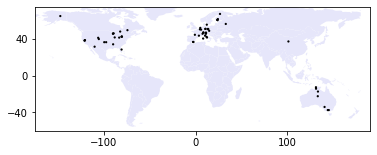

In [3]:
fig_name = 'map_fig1.svg'
map_sites(fig_name)

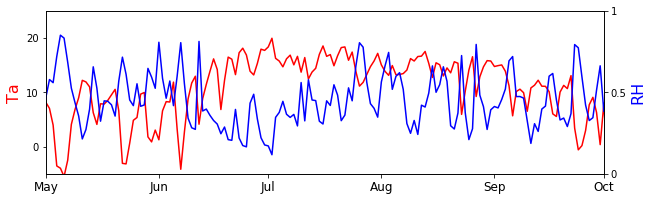

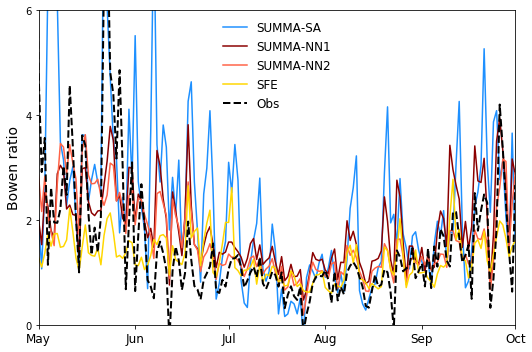

In [4]:
fig_site_year_Ts('US-GLE', 2007)

In [5]:
source1 = 'T_air'
source2 = 'RH'
model_list = ['SUMMA', 'SUMMA_NN1', 'SUMMA_NN2', 'SFE']
color_list = ['dodgerblue', 'darkred', 'tomato', 'gold']
bin_bounds_B = [[0, 6], [-10, 40], [0, 1]]
bin_bounds_flux = [[0, 650], [-10, 40], [0, 1]]
bin_bounds_EF = [[0, 1], [-10, 40], [0, 1]]
nbins=50
outdir = '../../PROJECTS/InfoFlow_SourceDep'

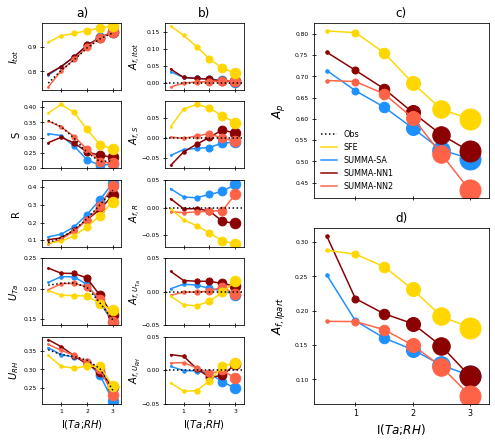

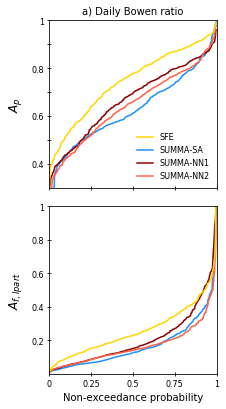

In [6]:
target_o = 'B'
results = get_decomp_results(target_o, source1, source2, model_list, bin_bounds_B, nbins=nbins)

outfile_res = os.path.join(outdir, 'results', 'outdata_%s.pickle' % (target_o))
with open(outfile_res, 'wb') as f:
    dump(results, f)
    
fig_name1 = os.path.join(outdir, 'WRR_figures', 'main_performance_%s_D.pdf' % (target_o))
fig_results(results, model_list, fig_name1, color_list = color_list)

fig_name2 = os.path.join(outdir, 'WRR_figures', 'SI_performance_%s_D.svg' % (target_o))
fig_SI_flux_CDF(results, fig_name2, 'a) Daily Bowen ratio', model_list=model_list, color_list = color_list) 

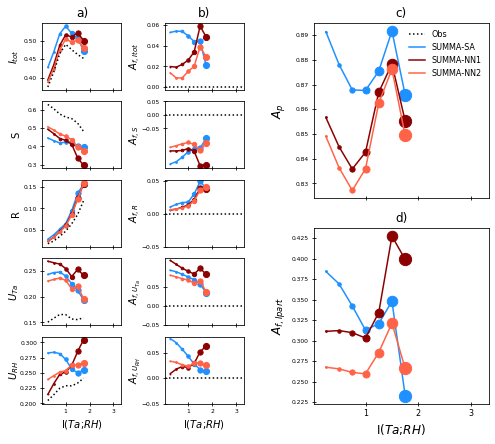

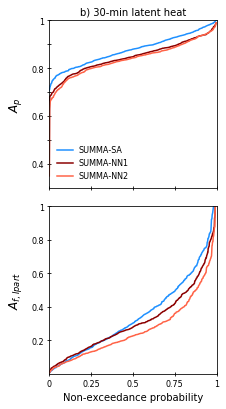

In [7]:
target_o = 'LE'
results = get_decomp_results(target_o, source1, source2, model_list[:-1], bin_bounds_flux, daily_resample=False)

outfile_res = os.path.join(outdir, 'results', 'outdata_%s_HH.pickle' % (target_o))
with open(outfile_res, 'wb') as f:
    dump(results, f)
    
fig_name1 = os.path.join(outdir, 'WRR_figures', 'main_performance_%s_HH.pdf' % (target_o))
fig_results(results, model_list[:-1], fig_name1, color_list = color_list[:-1], xbin=np.linspace(0.25, 2.5, 10))

fig_name2 = os.path.join(outdir, 'WRR_figures', 'SI_performance_%s_HH.svg' % (target_o))
fig_SI_flux_CDF(results, fig_name2, 'b) 30-min latent heat', model_list=model_list[:-1], color_list = color_list[:-1])

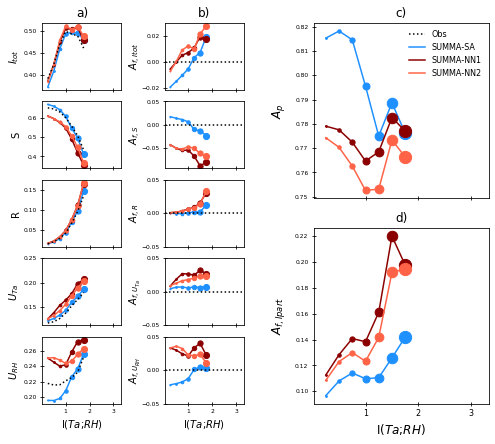

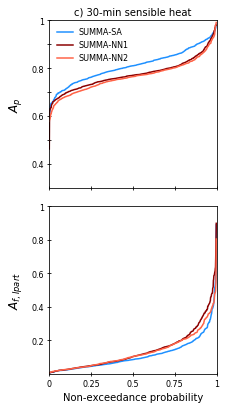

In [8]:
target_o = 'H'
results = get_decomp_results(target_o, source1, source2, model_list[:-1], bin_bounds_flux, daily_resample=False)

outfile_res = os.path.join(outdir, 'results', 'outdata_%s_HH.pickle' % (target_o))
with open(outfile_res, 'wb') as f:
    dump(results, f)
    
fig_name1 = os.path.join(outdir, 'WRR_figures', 'main_performance_%s_HH.pdf' % (target_o))
fig_results(results, model_list[:-1], fig_name1, color_list = color_list[:-1], xbin=np.linspace(0.25, 2.5, 10))

fig_name2 = os.path.join(outdir, 'WRR_figures', 'SI_performance_%s_HH.svg' % (target_o))
fig_SI_flux_CDF(results, fig_name2, 'c) 30-min sensible heat', model_list=model_list[:-1], color_list = color_list[:-1])